In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

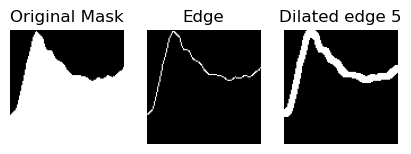

In [19]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(5,5))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated edge 5'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [17]:
sample = cv2.imread("tgs_salt/1bd1c8c771.png")
# Convert original to sample representation.
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)

# Convert sample to floating point and normalize to the range [0., 1.]
sample = sample.astype(np.float64)
sample = sample / 255.

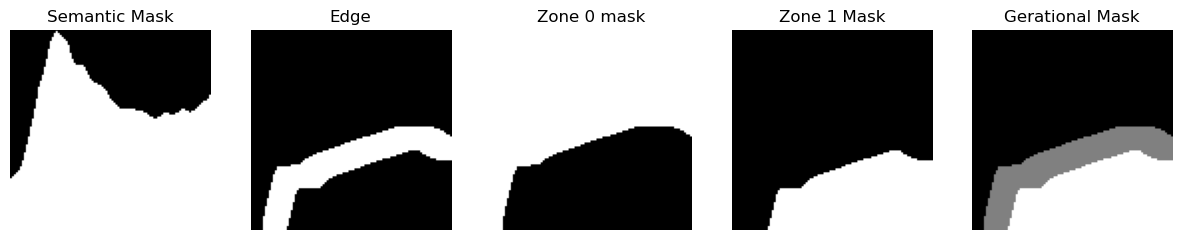

In [28]:
#show dilated_edge, semantic_mask, reduced_semantic_mask, reduced_inverted_mask
plt.figure(figsize=(15,15))

plt.subplot(151),plt.imshow(sample_semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0 mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1 Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(fullmask,cmap = 'gray')
plt.title('Gerational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
def create_Masks(semantic_mask):
    # Calculating Masks

    edges = cv2.Canny(semantic_mask,100,200)
    kernel = np.ones((11,11))
    dilated_edge = cv2.dilate(edges, kernel, iterations=1)
    inv_edge     = cv2.bitwise_not(dilated_edge)

    # Inverting the mask 
    mask_inverted = cv2.bitwise_not(semantic_mask)

    # Normalize to the range [0., 1.]
    semantic_mask = semantic_mask.astype(np.float64) / 255.
    mask_inverted = mask_inverted.astype(np.float64) / 255.
    dilated_edge = dilated_edge.astype(np.float64) / 255.
    inv_edge     = inv_edge.astype(np.float64) / 255.

    zone0 = semantic_mask * inv_edge
    zone1 = mask_inverted * inv_edge

    fullmask = zone0*1 + dilated_edge*2 +zone1*3

    return dilated_edge, zone0, zone1, fullmask


def sampleBreak(sample, mask):
    dilated_edge, zone0, zone1, fullmask = create_Masks(mask)
    sample_dilated_edge = sample * dilated_edge
    sample_reduced  = sample * zone0
    sample_inverted = sample * zone1
    return sample_dilated_edge, sample_reduced, sample_inverted

def incomplete(mask):
    # The texture can be synthesized while the mask has unfilled entries.
    mh, mw = mask.shape[:2]
    num_completed = np.count_nonzero(mask)
    num_incomplete = (mh * mw) - num_completed
    return num_incomplete 
    
def load(path):
    sample = cv2.imread(path)
    sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
    return sample

# Sample x mask

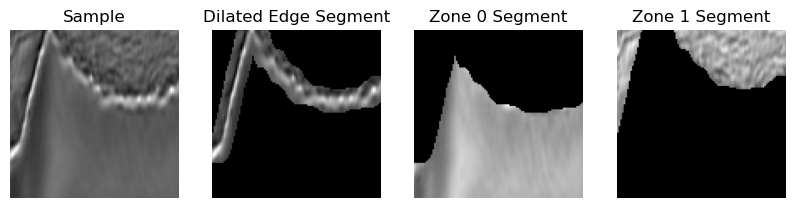

In [26]:
# show sample, dilated_edge_sample, reduced_sample, inverted_sample
plt.figure(figsize=(10,10))
plt.subplot(141),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Segment'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [8]:
sample_path="tgs_salt/1bd1c8c771.png"
sample_semantic_mask_path="tgs_salt/1bd1c8c771Mask.png"
generat_mask_path="tgs_salt/0bdd44d530Mask.png" 

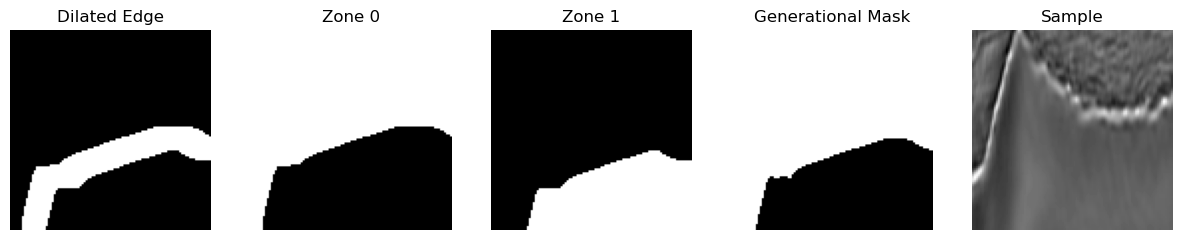

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(151),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(152),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(153),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(154),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generational Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(155),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

# Load images and show

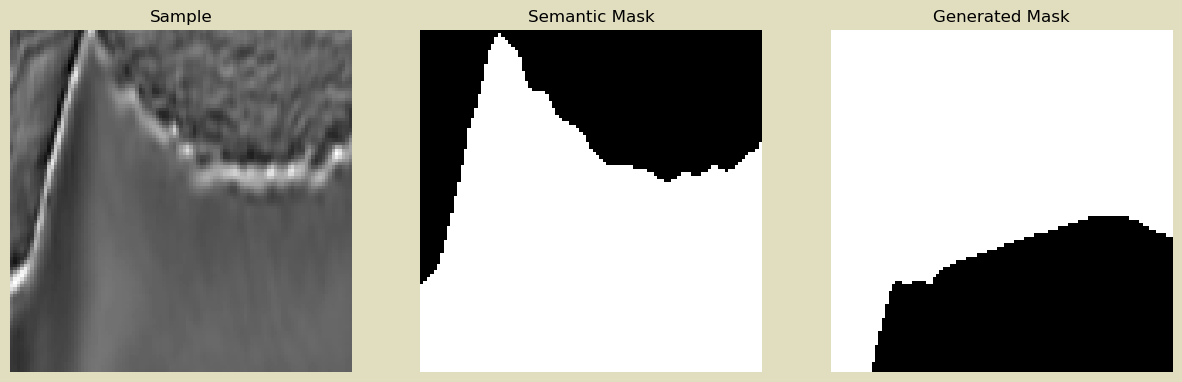

In [21]:
sample = load(sample_path)
sample_semantic_mask = load(sample_semantic_mask_path)
generat_mask = load(generat_mask_path)

plt.figure(figsize=(15,15),facecolor="#e1ddbf")
plt.subplot(131),plt.imshow(sample,cmap = 'gray')
plt.title('Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(sample_semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [22]:
sample_dilated_edge, sample_reduced, sample_inverted = sampleBreak(sample, sample_semantic_mask)
#show images

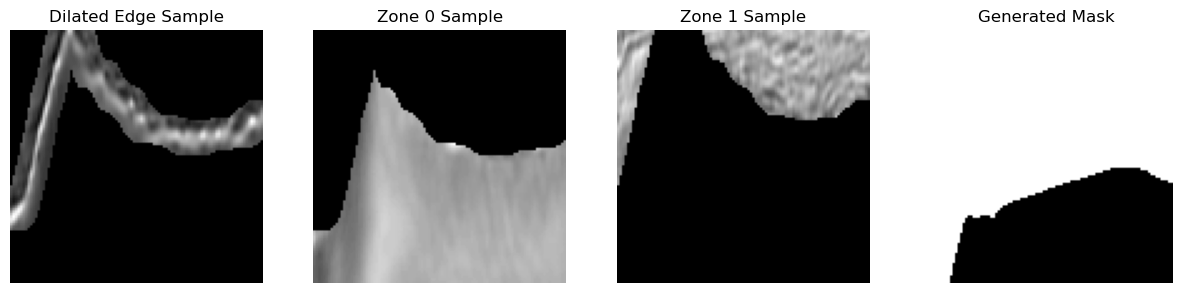

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Zone 0 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Zone 1 Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


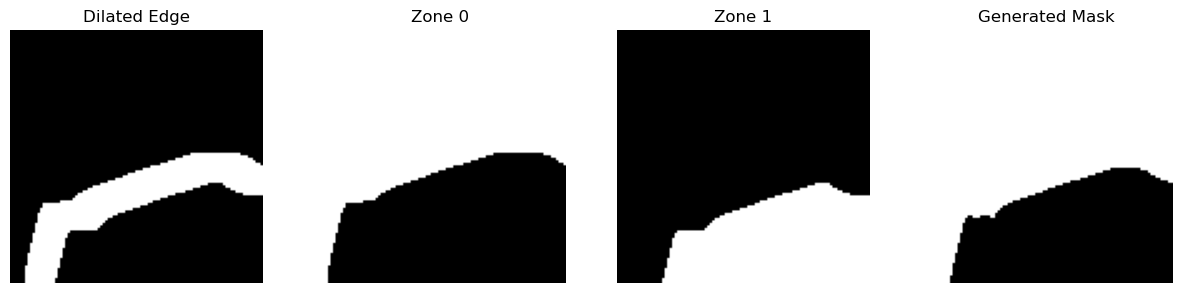

In [24]:
dilated_edge, zone0, zone1, fullmask = create_Masks(generat_mask)
#show images
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(zone0,cmap = 'gray')
plt.title('Zone 0'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(zone1,cmap = 'gray')
plt.title('Zone 1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(generat_mask,cmap = 'gray')
plt.title('Generated Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


In [29]:
generat_mask
incomplete(generat_mask)

3243